# PyTorch Workflow For Linear Regression #
## The objective is to develop a model for multiclass classification and evaluate its capabilities.

### Generate data for Linear Regression
- Create synthetic data with set weight and bias
- Split into train/test set

Actual Weight/bias: 0.7/0.3


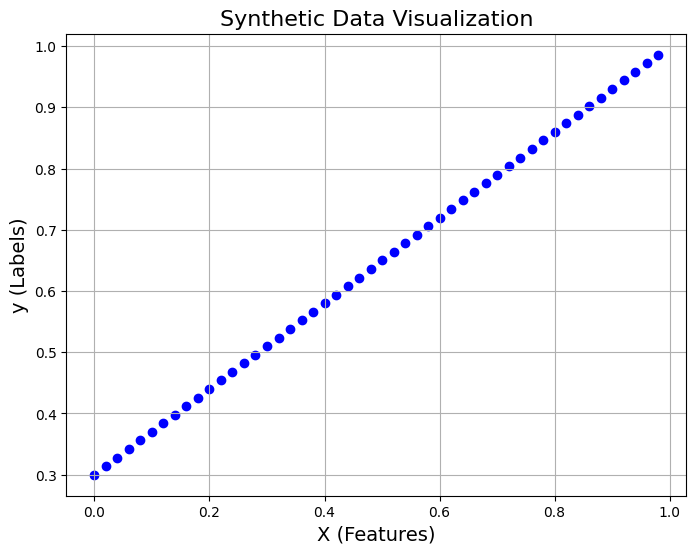

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create synthetic data following linear regression formula `y = mx + c`
weight = 0.70
bias = 0.30
print(f"Actual Weight/bias: {weight}/{bias}")

# Set range values
start=0
end=1
step=0.02

# Create features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), color='blue', label='Data points')

# Add labels and title
plt.title("Synthetic Data Visualization", fontsize=16)
plt.xlabel("X (Features)", fontsize=14)
plt.ylabel("y (Labels)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

### Settings for model

In [3]:
import torch
 
# Use GPU if available else CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Device information
print(f"Data is stored in {device}")

Data is stored in cpu


### Split into training and testing set

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 40
Testing data size: 10


### Hyperparameters for model are as follows:

In [6]:
import torch.nn as nn
inp_dim = len(X[0])
out_dim = len(y[0])

### Plot the predicted data from the initialized model

Initial weight and bias
OrderedDict([('weight', tensor([[0.7645]])), ('bias', tensor([0.8300]))])


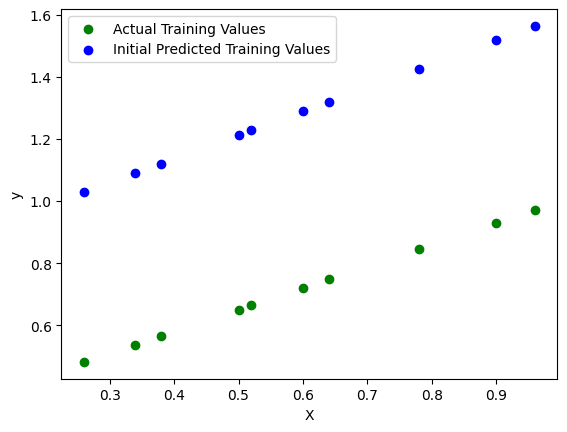

In [11]:
import matplotlib.pyplot as plt

# Set manual seed
torch.manual_seed(42)

# Linear layer that takes one input and gives one output
# nn.Linear creates a dense layer where the input is mapped to the output
# In this case, one input is mapped to one output; bias is True by default
layer = nn.Linear(inp_dim, out_dim)

# Let's see what the initial weight and bias is
print('Initial weight and bias')
print(layer.state_dict())

y_pred_test = layer(X_test)
y_pred_numpy = y_pred_test.detach().numpy()

plt.scatter(X_test,y_test, c='g',label = 'Actual Training Values')
plt.scatter(X_test, y_pred_numpy, c='b', label = 'Initial Predicted Training Values')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Since the predictions are not ideal, create a linear regression class, initialize it and ensure it gets same weight/bias.

In [14]:
# Set seed for consistency
torch.manual_seed(42)

# nn.Module is the master class for creating neural networks in PyTorch
class model(nn.Module):
    # Function to initialize nn.Module 
    def __init__(self, inp_dim, out_dim):
        super(model, self).__init__()
        self.layer = nn.Linear(inp_dim, out_dim)
        
    # Use the model to predict for y
    def forward(self, x):
        x = self.layer(x)
        return x
        
model_lr = model(inp_dim, out_dim)    
model_lr.state_dict()        
# Let's see what the initial weight and bias is
print('Initial weight and bias:')
print(model_lr.state_dict())  

Initial weight and bias:
OrderedDict([('layer.weight', tensor([[0.7645]])), ('layer.bias', tensor([0.8300]))])


# Now do a training loop to improve upon weight and bias

In [16]:
# Now let's set the training loop for the parameters to get better

import torch.optim as optim
epochs = 200

# Set the loss function
loss_fn = nn.L1Loss()

# Set the optimizer
optimizer = optim.SGD(model_lr.parameters(), lr=0.01)

# List to store the loss
train_losses = []
test_losses = []
epoch_list = []

for epoch in range(epochs):
    # Create a list for epochs
    epoch_list.append(epoch)
    # Set model to training mode
    model_lr.train()
    
    # Forward pass #1: predictions made
    y_pred_train = model_lr(X_train)
    
    # Forward pass #2: Calculate loss
    train_loss = loss_fn(y_pred_train, y_train)
    train_losses.append(train_loss.item())
    
    # Backward pass #1: clear gradients if not the gradient accumulates
    optimizer.zero_grad()
    
    # Backward pass #2: perform backpropragation where how much the weight and bias contributed to the loss is found out
    train_loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # START TESTING
    # Set to evaluation mode
    model_lr.eval()
    
    # Disable gradient calculation
    with torch.inference_mode():
        y_pred_test = model_lr(X_test)
        test_loss = loss_fn(y_pred_test, y_test)
        test_losses.append(test_loss.item())
        
        # Print the epoch every 20 epochs
        if (epoch + 1) % 20 ==0:
            print(f"Epoch:{epoch+1}/{epochs} | Test Loss: {test_loss}")
            
        
# Let's see what the final weight and bias is
print('\n')
print('Final weight and bias')
print(model_lr.state_dict())

Epoch:20/200 | Test Loss: 0.31321391463279724
Epoch:40/200 | Test Loss: 0.05847126245498657
Epoch:60/200 | Test Loss: 0.021029997617006302
Epoch:80/200 | Test Loss: 0.01321862917393446
Epoch:100/200 | Test Loss: 0.005356526467949152
Epoch:120/200 | Test Loss: 0.011089062318205833
Epoch:140/200 | Test Loss: 0.011089062318205833
Epoch:160/200 | Test Loss: 0.011089062318205833
Epoch:180/200 | Test Loss: 0.011089062318205833
Epoch:200/200 | Test Loss: 0.011089062318205833


Final weight and bias
OrderedDict([('layer.weight', tensor([[0.7027]])), ('layer.bias', tensor([0.3095]))])


# Plot the training loss against the test loss

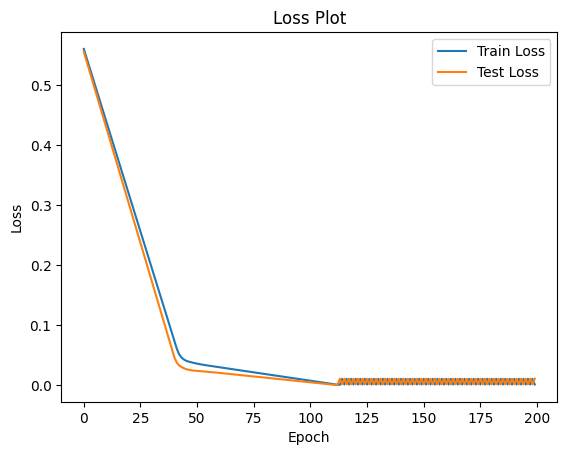

In [17]:
# Let's plot the loss

plt.plot(epoch_list, train_losses, label = 'Train Loss')
plt.plot(epoch_list, test_losses, label = 'Test Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the predicted test values and the actual test values to see how much they align.

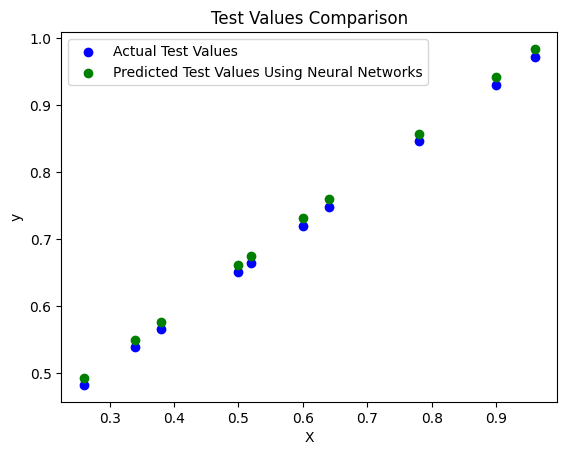

In [18]:
# Plot the predicted test values against the acutal test values

plt.scatter(X_test, y_test, c='b', label='Actual Test Values')
plt.scatter(X_test, y_pred_test, c='g', label='Predicted Test Values Using Neural Networks')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Values Comparison')
plt.show()

# Save the model_lr parameters

In [20]:
import os
parent_dir = os.getcwd()

from pathlib import Path
model_dir = Path(f"{parent_dir}/Models")

model_lr_path = model_dir/'model_lr.pth'

# Common way to save model parameters in PyTorch
torch.save(model_lr.state_dict(), model_lr_path)

print(f"Model successfully saved at: {model_lr_path}")

Model successfully saved at: /data/home/rizan.fazily/Neural Networks/PyTorch/Models/model_lr.pth


# Load the model parameters

In [23]:
# Create a new model
loaded_model_lr = model(inp_dim, out_dim)

# Import saved model parameters
import os
parent_dir = os.getcwd()

from pathlib import Path
model_dir = Path(f"{parent_dir}/Models")
model_path = model_dir/'model_lr.pth'


# Load the model parameters
model_lr_params = torch.load(model_path)

# Load the model parameters into the new model
loaded_model_lr.load_state_dict(model_lr_params)

print('Loaded model parameters:')
print(loaded_model_lr.state_dict())

Loaded model parameters:
OrderedDict([('layer.weight', tensor([[0.7027]])), ('layer.bias', tensor([0.3095]))])


# Plot the loaded model testing data with the actual testing data to ensure it is still the same

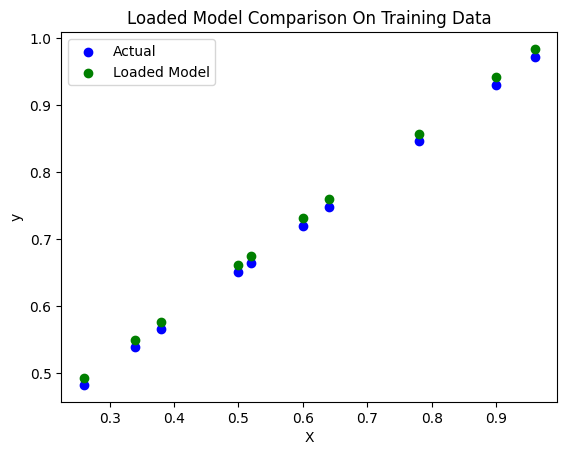

In [24]:
# Make predictions on loaded model
loaded_model_lr.eval()
with torch.inference_mode():
    y_preds_loaded = (loaded_model_lr(X_test)).detach().numpy()

plt.scatter(X_test, y_test, c='b', label='Actual')
plt.scatter(X_test, y_preds_loaded, c='g', label='Loaded Model')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Loaded Model Comparison On Training Data')
plt.show()

# Make prediction using loaded model

In [26]:
X_float =[0.02]
X_tensor = torch.tensor(X_float)
y_tensor = loaded_model_lr(X_tensor)
print(f"model : loaded_model_lr | X_value : {X_tensor[0]} | y_value : {y_tensor[0]}")

model : loaded_model_lr | X_value : 0.019999999552965164 | y_value : 0.3235624134540558
